# Data Cleaning and Preprocessing in the Notebook

In this notebook, I primarily focus on cleaning and processing the data. The following steps outline the initial operations performed:

1. **Data Aggregation:** Consolidating data from individual cities into a single DataFrame.
2. **Data Type Conversion:** Changing data types within rows for further analysis.
3. **Handling 'Rok Budowy' (Year of Construction):**
   - Investigating and rectifying apparent typos and inconsistencies in the 'Rok Budowy' column.
4. **Standardizing Floor Information:**
   - Converting varied floor values (e.g., '3/7', '3/9') into a uniform representation ('3', indicating the 3rd floor).
5. **Cleaning 'Cena za m2' (Price per Square Meter) values:**
   - Trimming extreme values by removing outliers: eliminating 3 standard deviations above the mean.
   - Removing values below 4000 PLN per square meter.

These data cleaning and preprocessing tasks help ensure the data is more uniform, accurate, and suitable for subsequent analysis and modeling. The steps mentioned aim to create a more consistent and manageable dataset for further exploration and insights.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
katalog = r'C:\Users\chceg\Untitled Folder 2\OTD'

In [51]:
# Inicjalizacja pustego DataFrame, do którego będziemy dodawać dane
wszystkie_dane = pd.DataFrame()

# Lista plików CSV zaczynających się od "OTD"
pliki_csv_otd = [plik for plik in os.listdir(katalog) if plik.startswith('OTD')]

# Wczytywanie wszystkich plików CSV i dodawanie ich do wspólnego DataFrame
for plik_csv in pliki_csv_otd:
    sciezka_do_pliku = os.path.join(katalog, plik_csv)
    dane = pd.read_csv(sciezka_do_pliku)
    wszystkie_dane = wszystkie_dane.append(dane, ignore_index=True)

In [52]:
wszystkie_dane

,Unnamed: 0,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
0,0,Elegancki apartament na Stary Mieście+zarz. na...,899 000,37.00,https://otodom.pl/pl/oferta/elegancki-apartame...,do zamieszkania,2.0,parter/3,miejskie,prywatny,1958,nie,Gdańsk,54.352413,18.654587,cegła,24297.297297297297
1,1,Apartament nadmorski Przystań Letnica Gdańsk,757 000,43.20,https://otodom.pl/pl/oferta/apartament-nadmors...,do zamieszkania,2.0,2/5,miejskie,prywatny,2022,tak,Gdańsk,54.390970,18.653380,żelbet,17523.148148148146
2,2,"Stan deweloperski, piękny widok, bez pośredników",665 000,66.59,https://otodom.pl/pl/oferta/stan-deweloperski-...,do wykończenia,3.0,5/5,miejskie,prywatny,2022,tak,Gdańsk,54.310255,18.598756,brak informacji,9986.484457125694
3,3,Enklawa w sercu Wrzeszcza - 2 pokoje,600 000,60.00,https://otodom.pl/pl/oferta/enklawa-w-sercu-wr...,do zamieszkania,2.0,2/3,miejskie,biuro nieruchomości,1960,nie,Gdańsk,54.386520,18.626400,cegła,10000.0
4,4,>70m2 | taras | 4 pokoje | DNI OTWARTE,663 520,74.09,https://otodom.pl/pl/oferta/70m2-taras-4-pokoj...,do wykończenia,3.0,4,miejskie,biuro nieruchomości,brak informacji,tak,Gdańsk,54.323699,18.616291,brak informacji,8955.594547172357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57614,9296,"1,4 Km od Rynku Idealne dla Rodziny Stare Miasto",456 000,46.50,https://otodom.pl/pl/oferta/1-4-km-od-rynku-id...,Zapytaj,3,1/6,Zapytaj,biuro nieruchomości,2021,nie,Wrocław,51.123450,17.040010,brak informacji,9806.451612903225
57615,9297,"2-pokoje, komfortowa lokalizacja - Sienkiewicza.",834 000,65.97,https://otodom.pl/pl/oferta/2-pokoje-komfortow...,do zamieszkania,2,1/4,elektryczne,biuro nieruchomości,1915,nie,Wrocław,51.115700,17.063400,cegła,12642.110050022739
57616,9298,ładne 2 pokojowe,489 000,54.00,https://otodom.pl/pl/oferta/ladne-2-pokojowe-I...,do zamieszkania,2,4/5,miejskie,biuro nieruchomości,1930,nie,Wrocław,51.123858,17.044852,cegła,9055.555555555555
57617,9299,Penthouse z widokiem na miasto - Wysoki Standard!,1 550 000,79.19,https://otodom.pl/pl/oferta/penthouse-z-widoki...,do zamieszkania,2,8/8,miejskie,biuro nieruchomości,2010,tak,Wrocław,51.115900,17.021400,silikat,19573.178431620156


In [53]:
df = wszystkie_dane.drop(columns=['Unnamed: 0'])

In [54]:
df['Cena'] = pd.to_numeric(df['Cena'].str.replace('\xa0', '').str.replace(' ', ''), errors='coerce')


In [55]:
df['Powierzchnia'] = df['Powierzchnia'].astype(float)
df['Liczba pokoi'] = pd.to_numeric(df['Liczba pokoi'], errors='coerce')
df['Rok budowy'] = pd.to_numeric(df['Rok budowy'], errors='coerce').astype('Int64')
df['cena za m2'] = pd.to_numeric(df['cena za m2'], errors='coerce')


In [56]:
df

,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
0,Elegancki apartament na Stary Mieście+zarz. na...,899000.0,37.00,https://otodom.pl/pl/oferta/elegancki-apartame...,do zamieszkania,2.0,parter/3,miejskie,prywatny,1958,nie,Gdańsk,54.352413,18.654587,cegła,24297.297297
1,Apartament nadmorski Przystań Letnica Gdańsk,757000.0,43.20,https://otodom.pl/pl/oferta/apartament-nadmors...,do zamieszkania,2.0,2/5,miejskie,prywatny,2022,tak,Gdańsk,54.390970,18.653380,żelbet,17523.148148
2,"Stan deweloperski, piękny widok, bez pośredników",665000.0,66.59,https://otodom.pl/pl/oferta/stan-deweloperski-...,do wykończenia,3.0,5/5,miejskie,prywatny,2022,tak,Gdańsk,54.310255,18.598756,brak informacji,9986.484457
3,Enklawa w sercu Wrzeszcza - 2 pokoje,600000.0,60.00,https://otodom.pl/pl/oferta/enklawa-w-sercu-wr...,do zamieszkania,2.0,2/3,miejskie,biuro nieruchomości,1960,nie,Gdańsk,54.386520,18.626400,cegła,10000.000000
4,>70m2 | taras | 4 pokoje | DNI OTWARTE,663520.0,74.09,https://otodom.pl/pl/oferta/70m2-taras-4-pokoj...,do wykończenia,3.0,4,miejskie,biuro nieruchomości,<NA>,tak,Gdańsk,54.323699,18.616291,brak informacji,8955.594547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57614,"1,4 Km od Rynku Idealne dla Rodziny Stare Miasto",456000.0,46.50,https://otodom.pl/pl/oferta/1-4-km-od-rynku-id...,Zapytaj,3.0,1/6,Zapytaj,biuro nieruchomości,2021,nie,Wrocław,51.123450,17.040010,brak informacji,9806.451613
57615,"2-pokoje, komfortowa lokalizacja - Sienkiewicza.",834000.0,65.97,https://otodom.pl/pl/oferta/2-pokoje-komfortow...,do zamieszkania,2.0,1/4,elektryczne,biuro nieruchomości,1915,nie,Wrocław,51.115700,17.063400,cegła,12642.110050
57616,ładne 2 pokojowe,489000.0,54.00,https://otodom.pl/pl/oferta/ladne-2-pokojowe-I...,do zamieszkania,2.0,4/5,miejskie,biuro nieruchomości,1930,nie,Wrocław,51.123858,17.044852,cegła,9055.555556
57617,Penthouse z widokiem na miasto - Wysoki Standard!,1550000.0,79.19,https://otodom.pl/pl/oferta/penthouse-z-widoki...,do zamieszkania,2.0,8/8,miejskie,biuro nieruchomości,2010,tak,Wrocław,51.115900,17.021400,silikat,19573.178432


In [57]:
wszystkie_dane.to_csv('OTD.csv')

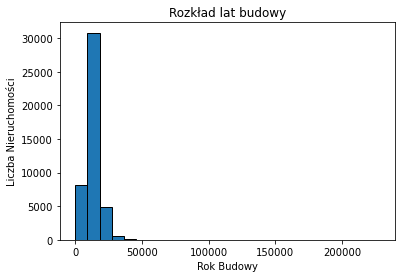

In [58]:
import matplotlib.pyplot as plt
# Tworzenie histogramu kolumny "RokBudowy"
plt.hist(df['cena za m2'], bins=25, edgecolor='k')  # Możesz dostosować ilość binów, kolor krawędzi itp.

# Dodanie opisów do wykresu
plt.title('Rozkład lat budowy')
plt.xlabel('Rok Budowy')
plt.ylabel('Liczba Nieruchomości')

# Wyświetlenie wykresu
plt.show()

In [59]:
wszystkie_dane['Rok budowy'] = pd.to_numeric(wszystkie_dane['Rok budowy'], errors='coerce')

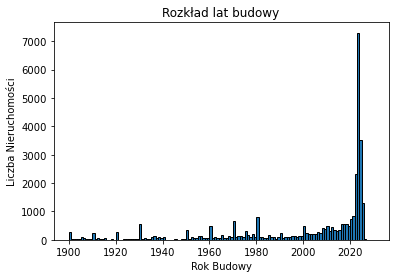

In [60]:

# Zamiana "brak informacji" na NaN
wszystkie_dane['Rok budowy'] = pd.to_numeric(wszystkie_dane['Rok budowy'], errors='coerce')

# Tworzenie histogramu kolumny "RokBudowy" z dostosowanym zakresem osi X
plt.hist(wszystkie_dane['Rok budowy'].dropna().astype(int), bins=range(1900, 2031), edgecolor='k')

# Dodanie opisów do wykresu
plt.title('Rozkład lat budowy')
plt.xlabel('Rok Budowy')
plt.ylabel('Liczba Nieruchomości')

# Wyświetlenie wykresu
plt.show()


In [61]:
wszystkie_dane['Rok budowy'].nunique()

193

In [62]:
# Filtrowanie DataFrame, aby wybrać rekordy z latami od 2023 do 2025
filtrowane_dane = wszystkie_dane[(wszystkie_dane['Rok budowy'] >= 2023) & (wszystkie_dane['Rok budowy'] <= 2025)]

# Obliczenie liczby pasujących rekordów
liczba_wartosci_w_zakresie = len(filtrowane_dane)

print("Liczba wartości w latach 2023-2025:", liczba_wartosci_w_zakresie)


Liczba wartości w latach 2023-2025: 12122


In [63]:
# Filtrowanie DataFrame, aby wybrać rekordy z latami od 2023 do 2025
filtrowane_dane = df[(df['Rok budowy'] >= 2027)]

# Obliczenie liczby pasujących rekordów
liczba_wartosci_w_zakresie = len(filtrowane_dane)

print("Liczba wartości w latach po 2027:", liczba_wartosci_w_zakresie)

Liczba wartości w latach po 2027: 8


In [64]:
filtrowane_dane

,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
3059,8min do Tramwaju - wysoki standard - PROMOCJA,423485.0,39.70,https://otodom.pl/pl/oferta/8min-do-tramwaju-w...,do wykończenia,2.0,1/4,miejskie,biuro nieruchomości,20222,tak,Gdańsk,54.319064,18.590774,cegła,10667.128463
11381,Ekskluzywnie wykończony apartament - Bajeczna,749000.0,33.00,https://otodom.pl/pl/oferta/ekskluzywnie-wykon...,do zamieszkania,1.0,parter,miejskie,prywatny,2923,tak,Kraków,50.057282,19.977042,silikat,22696.969697
14858,"Penthouse z tarasem w luksusowym ""Angel Stradom""",4487730.0,123.00,https://otodom.pl/pl/oferta/penthouse-z-tarase...,do zamieszkania,3.0,5/5,miejskie,biuro nieruchomości,2121,tak,Kraków,50.053996,19.939290,brak informacji,36485.609756
16976,Apartament Premium | Rakowicka | 3 Pok | Taras,1793786.0,90.14,https://otodom.pl/pl/oferta/apartament-premium...,do zamieszkania,3.0,5/5,miejskie,biuro nieruchomości,2029,tak,Kraków,50.064580,19.938200,brak informacji,19900.000000
44229,Nie Zwlekaj !Kawalerka ! Muranów ! Cicha !,499999.0,27.00,https://otodom.pl/pl/oferta/nie-zwlekaj-kawale...,do zamieszkania,1.0,2/9,Zapytaj,biuro nieruchomości,19767,tak,Warszawa,52.217675,21.232198,cegła,18518.481481
45729,Kawalerka I piętro Starówka Warszawa Śródmieście,759000.0,23.18,https://otodom.pl/pl/oferta/kawalerka-i-pietro...,do zamieszkania,1.0,1/3,miejskie,biuro nieruchomości,11954,nie,Warszawa,52.252086,21.007859,cegła,32743.744607
49047,Przestronne 2-pokoje na zielonym osiedlu Winda,671000.0,53.70,https://otodom.pl/pl/oferta/przestronne-2-poko...,Zapytaj,2.0,3/4,miejskie,biuro nieruchomości,20223,tak,Wrocław,51.077572,16.990060,brak informacji,12495.344507
50318,Narożne 3-pokoje z ogrodem 40m2 Zieleń Winda,828400.0,64.15,https://otodom.pl/pl/oferta/narozne-3-pokoje-z...,Zapytaj,3.0,parter/4,miejskie,biuro nieruchomości,20223,tak,Wrocław,51.077572,16.990060,brak informacji,12913.484022


In [65]:
df.iloc[36725]['Link']

'https://otodom.pl/pl/oferta/komfortowe-dwupokojowe-ID4nBLg'

In [66]:
df.iloc[3059]['Rok budowy']

20222

In [67]:
df.at[3059, 'Rok budowy'] = 2022
df.at[11381, 'Rok budowy'] = 2023
df.at[14858, 'Rok budowy'] = 2021
df.at[3059, 'Rok budowy'] = 2022
df.at[44229, 'Rok budowy'] = 1976
df.at[45729, 'Rok budowy'] = 1954
df.at[49047, 'Rok budowy'] = 2023
df.at[50318, 'Rok budowy'] = 2023

In [68]:
unikalne_pietra = df['Piętro'].nunique()

print("Ilość unikalnych wartości w kolumnie 'Piętro':", unikalne_pietra)

Ilość unikalnych wartości w kolumnie 'Piętro': 282


In [69]:
unikalne_pietra

282

In [70]:
df['Piętro'] = df['Piętro'].apply(lambda x: x.split('/')[0] if '/' in str(x) else x)

In [71]:
unikalne_pietra2 = df['Piętro'].nunique()

print("Ilość unikalnych wartości w kolumnie 'Piętro':", unikalne_pietra2)

Ilość unikalnych wartości w kolumnie 'Piętro': 15


In [72]:
# Filtrowanie DataFrame, aby wybrać rekordy z latami od 2023 do 2025
filtrowane_dane = df[(df['Rok budowy'] <= 1600)]

# Obliczenie liczby pasujących rekordów
liczba_wartosci_w_zakresie = len(filtrowane_dane)

print("Liczba wartości w latach 2023-2025:", liczba_wartosci_w_zakresie)

Liczba wartości w latach 2023-2025: 27


In [73]:
filtrowane_dane

,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
10310,3 Pokojowe mieszkanie z balkonem-Krowodrza,731000.0,46.50,https://otodom.pl/pl/oferta/3-pokojowe-mieszka...,do zamieszkania,3.0,10,miejskie,biuro nieruchomości,198,tak,Kraków,50.084929,19.935580,wielka płyta,15720.430108
11665,"W pobliżu Wrocławskiej, 2 pokoje, kuchnia, balkon",645000.0,35.00,https://otodom.pl/pl/oferta/w-poblizu-wroclaws...,do zamieszkania,2.0,Zapytaj,gazowe,biuro nieruchomości,57,nie,Kraków,50.075010,19.932358,brak informacji,18428.571429
11998,Krowodrza super cena za 2 pokoje,582000.0,47.00,https://otodom.pl/pl/oferta/krowodrza-super-ce...,do zamieszkania,2.0,Zapytaj,miejskie,biuro nieruchomości,75,nie,Kraków,50.085418,19.906970,brak informacji,12382.978723
13999,"Grzegórzki, 4 pokoje, kuchnia, balkon",924000.0,67.00,https://otodom.pl/pl/oferta/grzegorzki-4-pokoj...,do zamieszkania,4.0,Zapytaj,miejskie,biuro nieruchomości,75,nie,Kraków,50.059989,19.963869,brak informacji,13791.044776
14149,Unikalna oferta blisko Rynku Głównego w Krakowie,2600000.0,127.23,https://otodom.pl/pl/oferta/unikalna-oferta-bl...,do zamieszkania,9.0,2,gazowe,biuro nieruchomości,1600,nie,Kraków,50.062456,19.940969,cegła,20435.431895
14545,Stare Miasto - 95 m2 na ul. Floriańskiej,2500000.0,95.24,https://otodom.pl/pl/oferta/stare-miasto-95-m2...,do zamieszkania,2.0,2,elektryczne,biuro nieruchomości,1509,nie,Kraków,50.063570,19.940270,brak informacji,26249.475010
14890,Mieszkanie - Kraków Prądnik Biały,1107833.0,83.61,https://otodom.pl/pl/oferta/mieszkanie-krakow-...,do wykończenia,3.0,3,miejskie,biuro nieruchomości,4,tak,Kraków,50.097850,19.925490,brak informacji,13250.005980
16703,Poddasze do adaptacji,450000.0,70.00,https://otodom.pl/pl/oferta/poddasze-do-adapta...,do remontu,1.0,2,Zapytaj,biuro nieruchomości,195,nie,Kraków,50.083799,19.924371,brak informacji,6428.571429
16707,Poddasze do adaptacji,450000.0,70.00,https://otodom.pl/pl/oferta/poddasze-do-adapta...,do remontu,1.0,2,Zapytaj,biuro nieruchomości,195,nie,Kraków,50.083799,19.924371,brak informacji,6428.571429
16947,Unikalna oferta blisko Rynku Głównego w Krakowie,3100000.0,155.00,https://otodom.pl/pl/oferta/unikalna-oferta-bl...,do zamieszkania,7.0,1,gazowe,biuro nieruchomości,1600,nie,Kraków,50.062456,19.940969,cegła,20000.000000


In [74]:
import pandas as pd
import numpy as np

# Zakładając, że 'df' to Twój DataFrame

# Oblicz średnią cenę za m2 i odchylenie standardowe dla każdego miasta
mean_price = df.groupby('Miasto')['cena za m2'].mean()
std_dev = df.groupby('Miasto')['cena za m2'].std()

# Zdefiniuj zakres, w którym wartości zostaną uznane za wartości odstające dla każdego miasta
lower_bound = mean_price - 2 * std_dev
upper_bound = mean_price + 3 * std_dev

# Usuń wartości odstające dla każdego miasta
filtered_df = df.groupby('Miasto').apply(lambda x: x[(x['cena za m2'] >= 4000) & (x['cena za m2'] <= upper_bound[x.name])])

# Zresetuj indeks w 'filtered_df'
filtered_df = filtered_df.reset_index(drop=True)

# Oblicz średnią cenę za m2 tylko dla tych przefiltrowanych wierszy dla każdego miasta
average_price = filtered_df.groupby('Miasto')['cena za m2'].mean()


In [75]:
lower_bound

Miasto
Gdańsk      2384.941212
Gdynia       515.749632
Kraków      4871.532614
Lublin      5490.479252
Poznań      3314.230589
Szczecin    2990.793478
Warszawa    3468.374082
Wrocław     5045.486628
Łodź        4267.985078
Name: cena za m2, dtype: float64

In [76]:
average_price

Miasto
Gdańsk      12989.966003
Gdynia      13287.176969
Kraków      14867.137895
Lublin       9351.506837
Poznań      10870.947654
Szczecin     9664.214457
Warszawa    16510.343717
Wrocław     12512.059718
Łodź         8611.071026
Name: cena za m2, dtype: float64

In [77]:
filtered_df

,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
0,Elegancki apartament na Stary Mieście+zarz. na...,899000.0,37.00,https://otodom.pl/pl/oferta/elegancki-apartame...,do zamieszkania,2.0,parter,miejskie,prywatny,1958,nie,Gdańsk,54.352413,18.654587,cegła,24297.297297
1,Apartament nadmorski Przystań Letnica Gdańsk,757000.0,43.20,https://otodom.pl/pl/oferta/apartament-nadmors...,do zamieszkania,2.0,2,miejskie,prywatny,2022,tak,Gdańsk,54.390970,18.653380,żelbet,17523.148148
2,"Stan deweloperski, piękny widok, bez pośredników",665000.0,66.59,https://otodom.pl/pl/oferta/stan-deweloperski-...,do wykończenia,3.0,5,miejskie,prywatny,2022,tak,Gdańsk,54.310255,18.598756,brak informacji,9986.484457
3,Enklawa w sercu Wrzeszcza - 2 pokoje,600000.0,60.00,https://otodom.pl/pl/oferta/enklawa-w-sercu-wr...,do zamieszkania,2.0,2,miejskie,biuro nieruchomości,1960,nie,Gdańsk,54.386520,18.626400,cegła,10000.000000
4,>70m2 | taras | 4 pokoje | DNI OTWARTE,663520.0,74.09,https://otodom.pl/pl/oferta/70m2-taras-4-pokoj...,do wykończenia,3.0,4,miejskie,biuro nieruchomości,<NA>,tak,Gdańsk,54.323699,18.616291,brak informacji,8955.594547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43312,"Ekstrawagancki loft w kompleksie ""u Scheiblera"".",995000.0,101.55,https://otodom.pl/pl/oferta/ekstrawagancki-lof...,do zamieszkania,3.0,3,miejskie,biuro nieruchomości,2010,tak,Łodź,51.753507,19.483103,cegła,9798.129000
43313,"Przestronny, ekskluzywny apartament w Centrum",833000.0,98.00,https://otodom.pl/pl/oferta/przestronny-eksklu...,Zapytaj,4.0,1,miejskie,biuro nieruchomości,<NA>,tak,Łodź,51.752705,19.477459,brak informacji,8500.000000
43314,Mieszkanie - Łódź Bałuty,385000.0,58.57,https://otodom.pl/pl/oferta/mieszkanie-lodz-ba...,do zamieszkania,2.0,3,Zapytaj,biuro nieruchomości,1950,nie,Łodź,51.784270,19.424000,cegła,6573.331057
43315,"B. ładne po gen.remoncie, balkon, oddzielne po...",303600.0,44.00,https://otodom.pl/pl/oferta/b-ladne-po-gen-rem...,do zamieszkania,2.0,1,Zapytaj,prywatny,<NA>,nie,Łodź,51.759490,19.431800,brak informacji,6900.000000


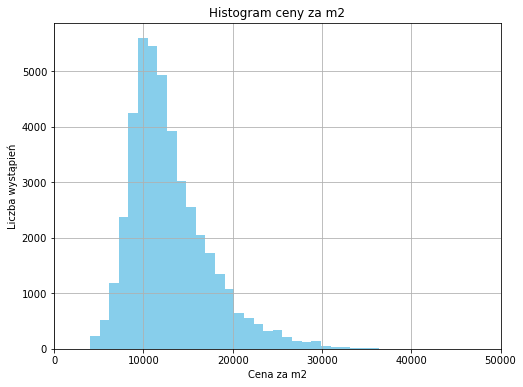

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Zakładając, że 'df' to Twój DataFrame

# Wykres histogramu ceny za m2 z ograniczeniem do zakresu od 0 do 50000
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['cena za m2'], bins=30, color='skyblue')
plt.title('Histogram ceny za m2')
plt.xlabel('Cena za m2')
plt.ylabel('Liczba wystąpień')
plt.grid(True)

# Ograniczenie osi x do zakresu od 0 do 50000
plt.xlim(0, 50000)

plt.show()


In [79]:
filtered_df

,Tytuł,Cena,Powierzchnia,Link,Stan wykończenia,Liczba pokoi,Piętro,Ogrzewanie,Ogłoszeniodawca,Rok budowy,Winda,Miasto,LAT,LON,Materiał budowy,cena za m2
0,Elegancki apartament na Stary Mieście+zarz. na...,899000.0,37.00,https://otodom.pl/pl/oferta/elegancki-apartame...,do zamieszkania,2.0,parter,miejskie,prywatny,1958,nie,Gdańsk,54.352413,18.654587,cegła,24297.297297
1,Apartament nadmorski Przystań Letnica Gdańsk,757000.0,43.20,https://otodom.pl/pl/oferta/apartament-nadmors...,do zamieszkania,2.0,2,miejskie,prywatny,2022,tak,Gdańsk,54.390970,18.653380,żelbet,17523.148148
2,"Stan deweloperski, piękny widok, bez pośredników",665000.0,66.59,https://otodom.pl/pl/oferta/stan-deweloperski-...,do wykończenia,3.0,5,miejskie,prywatny,2022,tak,Gdańsk,54.310255,18.598756,brak informacji,9986.484457
3,Enklawa w sercu Wrzeszcza - 2 pokoje,600000.0,60.00,https://otodom.pl/pl/oferta/enklawa-w-sercu-wr...,do zamieszkania,2.0,2,miejskie,biuro nieruchomości,1960,nie,Gdańsk,54.386520,18.626400,cegła,10000.000000
4,>70m2 | taras | 4 pokoje | DNI OTWARTE,663520.0,74.09,https://otodom.pl/pl/oferta/70m2-taras-4-pokoj...,do wykończenia,3.0,4,miejskie,biuro nieruchomości,<NA>,tak,Gdańsk,54.323699,18.616291,brak informacji,8955.594547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43312,"Ekstrawagancki loft w kompleksie ""u Scheiblera"".",995000.0,101.55,https://otodom.pl/pl/oferta/ekstrawagancki-lof...,do zamieszkania,3.0,3,miejskie,biuro nieruchomości,2010,tak,Łodź,51.753507,19.483103,cegła,9798.129000
43313,"Przestronny, ekskluzywny apartament w Centrum",833000.0,98.00,https://otodom.pl/pl/oferta/przestronny-eksklu...,Zapytaj,4.0,1,miejskie,biuro nieruchomości,<NA>,tak,Łodź,51.752705,19.477459,brak informacji,8500.000000
43314,Mieszkanie - Łódź Bałuty,385000.0,58.57,https://otodom.pl/pl/oferta/mieszkanie-lodz-ba...,do zamieszkania,2.0,3,Zapytaj,biuro nieruchomości,1950,nie,Łodź,51.784270,19.424000,cegła,6573.331057
43315,"B. ładne po gen.remoncie, balkon, oddzielne po...",303600.0,44.00,https://otodom.pl/pl/oferta/b-ladne-po-gen-rem...,do zamieszkania,2.0,1,Zapytaj,prywatny,<NA>,nie,Łodź,51.759490,19.431800,brak informacji,6900.000000


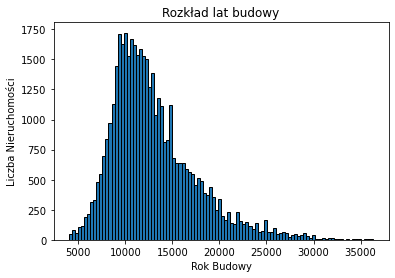

In [80]:
import matplotlib.pyplot as plt
# Tworzenie histogramu kolumny "RokBudowy"
plt.hist(filtered_df['cena za m2'], bins=100, edgecolor='k')  # Możesz dostosować ilość binów, kolor krawędzi itp.

# Dodanie opisów do wykresu
plt.title('Rozkład lat budowy')
plt.xlabel('Rok Budowy')
plt.ylabel('Liczba Nieruchomości')

# Wyświetlenie wykresu
plt.show()

In [83]:
filtered_df.to_csv('OTD.csv')